<a href="https://colab.research.google.com/github/choinkyo/Ensemble-Learning/blob/master/Ensemble_Learning(Random_Forest%2C_AdaBoost%2C_Gradient_Bosted_Trees).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensemble Learning

In this lab, you will practice how to use and fine-tune Random Forest, Gradient Boosted Trees in scikit-learn and [XGBoost](https://xgboost.readthedocs.io/en/latest/) model. You will also get yourselves familiar with the hyper-parameters for each model in their API.

In [1]:
# import packages
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import pandas as pd
# import xgboost as xgb
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample

# make this notebook's output stable across runs
np.random.seed(0)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# helper functions used in this lab
def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    """
    Plot the decision boundary of a learnt classifier
    """
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=1)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

## Synthetic Moon dataset
In this lab, we will classify a moon shaped synthetic dataset with two features (_x1_ and _x2_) and two classes (0 or 1) with some added noise. 

In [3]:
# load the moon train and test data from CSV files
train = pd.read_csv("https://raw.githubusercontent.com/zariable/data/master/halfmoon_train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/zariable/data/master/halfmoon_test.csv")

train_x = train.iloc[:,0:2]
train_y = train.iloc[:,2]

test_x = test.iloc[:,0:2]
test_y = test.iloc[:,2]

print("Number of train data: {}".format(len(train_y)))
print("Number of test data: {}".format(len(test_y)))

Number of train data: 3000
Number of test data: 1000


Text(0, 0.5, 'x2')

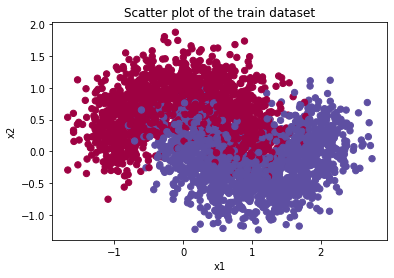

In [4]:
# plot the train dataset
plt.scatter(train_x.x1, train_x.x2, s=40, c=train_y, cmap=plt.cm.Spectral)
plt.title('Scatter plot of the train dataset')
plt.xlabel('x1')
plt.ylabel('x2')

Text(0, 0.5, 'x2')

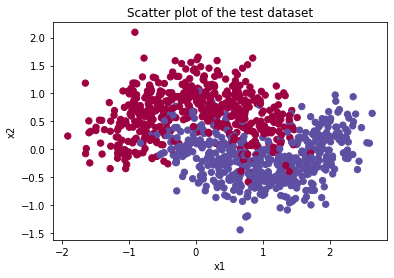

In [5]:
# plot the test dataset
plt.scatter(test_x.x1, test_x.x2, s=40, c=test_y, cmap=plt.cm.Spectral)
plt.title('Scatter plot of the test dataset')
plt.xlabel('x1')
plt.ylabel('x2')

## Decision Tree Classifier

<span style="color:orange">**In this exercise, we will apply the decision tree Classifier provided in scikit-learn to classify the synthetic moon data.**

In [6]:
# TODO: Build Decision Tree classifier
parameters = {
        'max_depth': [2,4], 
        'min_samples_split': [0.05, 0.1, 0.2]

}
dtc = DecisionTreeClassifier()
dtc_grid = GridSearchCV(dtc, parameters, cv=3)
dtc_grid.fit(train_x, train_y) 

# summarize the results of the grid search
print("The best score is {}".format(dtc_grid.best_score_))
print("The best hyper parameter setting is {}".format(dtc_grid.best_params_))

The best score is 0.8853333333333334
The best hyper parameter setting is {'max_depth': 2, 'min_samples_split': 0.05}


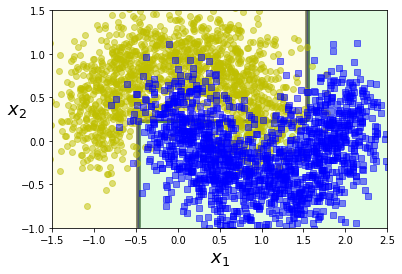

In [7]:
# plot the decision boundary
plot_decision_boundary(dtc_grid, train_x.values, train_y.values)

In [8]:
# make prediction and evaluate the model performance on test data
test_z = dtc_grid.predict(test_x)
test_z_prob = dtc_grid.predict_proba(test_x)[:,1]

print("model accuracy: {}".format(accuracy_score(test_y, test_z)))
print("model ROC AUC: {}".format(roc_auc_score(test_y, test_z_prob)))

model accuracy: 0.892
model ROC AUC: 0.8990000000000001


In [9]:
print(test_z)
print(test_z_prob)

[1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1
 1 1 1 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 1
 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0
 1 1 0 1 0 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 1
 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0
 0 0 0 1 1 1 1 0 1 1 0 1 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1
 0 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1
 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0
 0 0 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1
 0 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1
 1 0 0 0 1 1 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1
 0 0 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 1
 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0 0 1 1 0
 0 0 1 0 0 0 0 0 0 0 1 0 

---

## Random Forest

<span style="color:orange">**In this exercise, we will apply the Random Forest Classifier provided in scikit-learn to classify the synthetic moon data.**

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True (default). Please refer to the [scikit-learn doc](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) for more details on how to use the API.

You can play around with the following hype-parameters and see which set of hyper-parameters gives you the best score:
- criterion: The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.
- n_estimators: The number of trees in the forest.
- max_depth: The maximum depth of the tree.
- min_samples_split: The minimum number of samples required to split an internal node.

In [10]:
# TODO: fine-tune Random Forest classifier using grid search with cross-validation (GridSearchCV).
parameters = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [10, 20, 50],
    'max_depth': [2, 4], 
    'min_samples_split': [0.01, 0.05, 0.01]
}

rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, parameters, cv=3)
rfc_grid.fit(train_x, train_y)

# summarize the results of the grid search
print("The best score is {}".format(rfc_grid.best_score_))
print("The best hyper parameter setting is {}".format(rfc_grid.best_params_))

The best score is 0.892
The best hyper parameter setting is {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 0.01, 'n_estimators': 20}


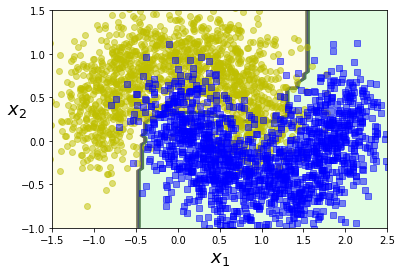

In [11]:
# plot the decision boundary
plot_decision_boundary(rfc_grid, train_x.values, train_y.values)

Notice that the decision boundary is no longer orthogonal to the x and y axises and is able to better separate the two classes in the moon dataset.

Now let's use the fine-tuned model to make predictions on the test dataset and evaluate it's performance in terms of accuracy and ROC AUC. It should outperform our simplified version of Random Forest as there are more optimizations being implemented in scikit-learn API.

In [12]:
# TODO: make prediction and evaluate the model performance on test data
test_z = rfc_grid.predict(test_x)
test_z_prob = rfc_grid.predict_proba(test_x)[:,1]

print("model accuracy: {}".format(accuracy_score(test_y, test_z)))
print("model ROC AUC: {}".format(roc_auc_score(test_y, test_z_prob)))

model accuracy: 0.889
model ROC AUC: 0.956962


---

## AdaBoost
<span style="color:orange">**In this exercise, we will apply AdaBoost classifier in scikit-learn to classify the synthetic moon dataset.**</span> 

### Train AdaBoost model
[Adaboost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) algorithm works by learning each base learner so that it corrects the mis-classified data points from previous classifiers, and use weighted voting of predictions from each base learners for the final prediction. 

There are two key hyper-parameters:
- n_estimators: The maximum number of estimators at which boosting is terminated. In case of perfect fit, the learning procedure is stopped early.
- learning_rate: Learning rate shrinks the contribution of each classifier by learning_rate. There is a trade-off between learning_rate and n_estimators.


In [13]:
# TODO: fine-tune Adaboost with decision tree (max_depth=4) as base learners using grid search with cross-validation (GridSearchCV).
parameters = {
    'n_estimators': [10,20,50],
    'learning_rate': [0.01, 0.1, 1]
}

adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), random_state=0)
adaboost_grid = GridSearchCV(adaboost, parameters, cv=3)
adaboost_grid.fit(train_x, train_y)


# summarize the results of the grid search
print("The best score is {}".format(adaboost_grid.best_score_))
print("The best hyper parameter setting is {}".format(adaboost_grid.best_params_))

The best score is 0.908
The best hyper parameter setting is {'learning_rate': 0.1, 'n_estimators': 50}


Visualize the decision boundaries.

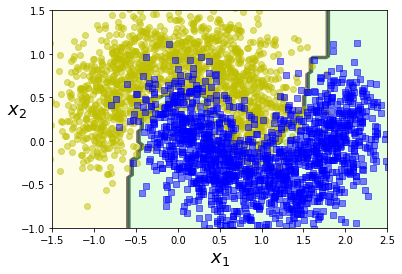

In [14]:
# plot the decision boundary
plot_decision_boundary(adaboost_grid, train_x.values, train_y.values)

Now let's use the fine-tuned model to make predictions on the test dataset and evaluate its performance in terms of accuracy and ROC AUC.

In [15]:
# TODO: make prediction and evaluate the model performance on test data
test_z = adaboost_grid.predict(test_x)
test_z_prob = adaboost_grid.predict_proba(test_x)[:,1]

print("model accuracy: {}".format(accuracy_score(test_y, test_z)))
print("model ROC AUC: {}".format(roc_auc_score(test_y, test_z_prob)))

model accuracy: 0.9
model ROC AUC: 0.9637819999999999


---

## Gradient Boosted Trees
<span style="color:orange">**In this exercise, we will apply the Gradient Boosted Tree classifier provided in scikit-learn to classify the synthetic moon dataset.**</span> 

Gradient Boosted Trees is a generalization of boosting to arbitrary differentiable loss functions, which can be used for both regression and classification problems. At a high level, gradient boosting works by sequentially adding predictors to an ensemble, each one correcting its predecessor. Gradient Boosted Trees, which is a special case of gradient boosting, uses regression trees as the base predictors and builds an additive model in a forward stage-wise fashion. In each stage, regression trees are fit on the negative gradient of the loss function used in a classification or a regression problem. Please refer to [Gradient Boosted Trees](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) for more details on how to use the API.

Gradient boosting introduces a new hyperparameter *learning_rate*, which scales the contribution of each tree. If you set it to a low values, such as 0.1, you will need more trees in the ensemble to fit the training data, but the predictions will usually generalize better. This is a regularization technique called shrinkage. In the exercise below, please include *learning_rate* as a hyperparameter in the model fine-tuning.

In [16]:
# TODO: fine-tune Gradient Boosted Trees using grid search with cross-validation (GridSearchCV).
parameters = {
    'learning_rate': [0.01, 0.01, 1],
    'min_samples_split': [0.05, 0.1, 0.2],
    'max_depth': [1, 2], 
    'n_estimators': [50, 100]
}

gbc_grid= GridSearchCV(GradientBoostingClassifier(), parameters, cv=3)
gbc_grid.fit(train_x, train_y) 

# summarize the results of the grid search
print("The best score is {}".format(gbc_grid.best_score_))
print("The best hyper parameter setting is {}".format(gbc_grid.best_params_))

The best score is 0.9083333333333333
The best hyper parameter setting is {'learning_rate': 1, 'max_depth': 1, 'min_samples_split': 0.05, 'n_estimators': 50}


Visualize the decision boundaries.

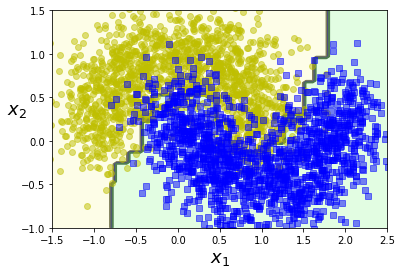

In [17]:
# plot the decision boundary for decision tree classifier
plot_decision_boundary(gbc_grid, train_x.values, train_y.values)

Now let's use the fine-tuned model to make predictions on the test dataset and evaluate its performance in terms of accuracy and ROC AUC.

In [18]:
# TODO: make prediction and evaluate the model performance on test data
test_z = gbc_grid.predict(test_x)
test_z_prob = gbc_grid.predict_proba(test_x)[:,1]

print("model accuracy: {}".format(accuracy_score(test_y, test_z)))
print("model ROC AUC: {}".format(roc_auc_score(test_y, test_z_prob)))

model accuracy: 0.899
model ROC AUC: 0.962994


---

## Implement a simplified version of Random Forest Classifier

In this exercise, you will implement the random forest classifier. 
- Use bootstrapping to generate different ensemble datasets, where you will train a separate classifier to each dataset.
- Apply grid search with cross-validation to learn and fine-tune each decision tree classifier.
- Implement two predict functions: one outputs the probabilities while the other outputs the predicted class.

In [27]:
class MyRandomForestClassifier:
    """
    Random Forest Classifier.
    """
    def __init__(self, n_estimators=100, models=None):
        self.n_estimators = n_estimators
        self.models = models

    def fit(self, x, y):
        """
        TODO: Train random forest classifier using bootstrapping and decision tree as the base classifier
        """
        

    def predict_proba(self, x):
        """
        TODO: Make predictions (probabilities) with the trained random forest
        """
        

    def predict(self, x):
        """
        TODO: Make predictions (the class/label) with the trained random forest
        """
        

### Train, predict and evaluate the random forest classifier

Even though this is a simplified version of random forest, we should see it outperforms the decision tree classifier above.

In [28]:
# Use the trained random forest model to make predictions on the test data and evaluate the model performance.

# train random forest classifier
mrfc = MyRandomForestClassifier(50)
mrfc.fit(train_x, train_y)

## Conclusion

By comparing the model performance as well as the decision boundaries learned from different classifiers on the same dataset, we clearly see ensemble learning are capable of modeling more complex patterns in the data as compared to decision trees, leading to superior performance on the test dataset.